<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 3


In [1]:
# Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Get data
data = pd.read_csv('bank.csv', header = 0, delimiter = ';')
print(list(data.columns))
data.head()

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# Checking Y values
data.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [4]:
# Checking any missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
# Checking data types
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
# Encoding Features in Y Column
le = preprocessing.LabelEncoder()
y_new = le.fit_transform(data['y'])
y_new

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
# ( 0 = 'NO' , 1 = 'YES')
data.y = y_new

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [9]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.47600088476001
percentage of subscription 11.523999115239992


In [10]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
1,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


Observations:
* The duration (last contact duration, in seconds) is significantly higher for customers who bought the term deposit than the customers who didn't.
* The average age of customers who bought the term deposit is higher than the customers who didn’t.
* The pdays (days since the customer was last contacted) is interestingly higher for the customers who bought it. 
* Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

##### Preprocessing Data For Machine Learning Process

In [11]:
dur = data.loc[data['duration'] == 0]
print(dur)
print(dur.shape)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []
(0, 17)


In [12]:
# Encoding all attributes using get dummies
X = data.drop('y',1)
X = pd.get_dummies(X)

# X axis
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [13]:
y = data.y

# Y axis
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [15]:
# Training and testing from data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3)

##### Implementing Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit (X_train, y_train)

C:\Users\roytu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
pred_logreg = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test,pred_logreg))
matrix_logreg=confusion_matrix(y_test,pred_logreg)
print(matrix_logreg)

0.8798820928518791
[[1178   20]
 [ 143   16]]


##### Implementing KNeighbors Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
kNN=KNeighborsClassifier()
kNN.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
pred_kNN=kNN.predict(X_test)

print(accuracy_score(y_test,pred_kNN))
matrix_kNN=confusion_matrix(y_test,pred_kNN)
print(matrix_kNN)

0.8717759764185704
[[1158   40]
 [ 134   25]]


##### Implementing Support Vector Machine

In [21]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(X_train,y_train)

SVC()

In [23]:
pred_SVM=svm_model.predict(X_test)
print(accuracy_score(y_test,pred_SVM))
matrix_SVM=confusion_matrix(y_test,pred_SVM)
print(matrix_SVM)

0.8828297715549005
[[1198    0]
 [ 159    0]]


##### Implementing Decision Tree

In [24]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
pred_dtc=dt.predict(X_test)
print(accuracy_score(y_test,pred_dtc))
matrix_dtc=confusion_matrix(y_test,pred_dtc)
print(matrix_dtc)

0.871039056742815
[[1113   85]
 [  90   69]]


##### Implementing Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
pred_RF=rf.predict(X_test)
print(accuracy_score(y_test,pred_RF))
matrix_RF=confusion_matrix(y_test,pred_RF)
print(matrix_RF)

0.8887251289609432
[[1176   22]
 [ 129   30]]


##### Implementing Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB 
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [29]:
pred_NB=nb.predict(X_test)

print(accuracy_score(y_test,pred_NB))
matrix_NB=confusion_matrix(y_test,pred_NB)
print(matrix_NB)

0.8400884303610906
[[1066  132]
 [  85   74]]


##### What do we get?

In [30]:
Logistic_Regression = accuracy_score(y_test,pred_logreg)
K_Nearest_Neighbors = accuracy_score(y_test,pred_kNN)
Support_Vector_Machine = accuracy_score(y_test,pred_SVM)
Decision_Tree = accuracy_score(y_test,pred_dtc)
Random_Forest = accuracy_score(y_test,pred_RF)
Naive_Bayes = accuracy_score(y_test,pred_NB)
models = [Logistic_Regression,K_Nearest_Neighbors,Support_Vector_Machine,Decision_Tree,Random_Forest,Naive_Bayes]

In [31]:
print("Logistic Regression:", Logistic_Regression)
print("KNN:", K_Nearest_Neighbors)
print("SVM:", Support_Vector_Machine)
print("Decision Tree:", Decision_Tree)
print("Random Forest:", accuracy_score(y_test,pred_RF))
print("Naive Bayes:", Naive_Bayes)


Logistic Regression: 0.8798820928518791
KNN: 0.8717759764185704
SVM: 0.8828297715549005
Decision Tree: 0.871039056742815
Random Forest: 0.8887251289609432
Naive Bayes: 0.8400884303610906


No handles with labels found to put in legend.


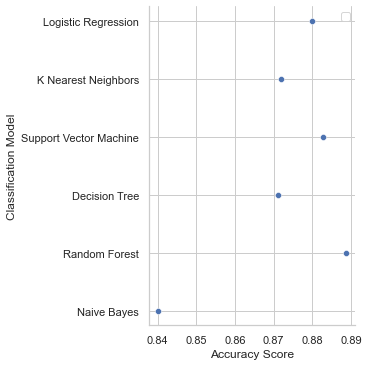

In [32]:
# Visualize for better understanding

Predict = np.array(models)
ser = pd.Series(Predict, index = ['Logistic Regression','K Nearest Neighbors',
                                  'Support Vector Machine','Decision Tree','Random Forest','Naive Bayes'])
%matplotlib inline

sns.relplot(x=ser,y=ser.index)

# Add labels
plt.xlabel('Accuracy Score')
plt.ylabel('Classification Model')
plt.legend()
plt.show()

Dari 5 model yang diterapkan dengan proporsi latihan sebesar 70% dari data;

Model Random Forest memiliki accuracy score terbaik dibanding model yang lain.

In [33]:
#Checking Important Features

clf = RandomForestClassifier(n_estimators = 200)
clf.fit(X_train,y_train)

feature_imp = pd.Series(clf.feature_importances_,index = X.columns).sort_values(ascending=False)
z = feature_imp.head()
z

duration            0.258493
balance             0.087633
age                 0.084159
day                 0.077110
poutcome_success    0.044315
dtype: float64

No handles with labels found to put in legend.


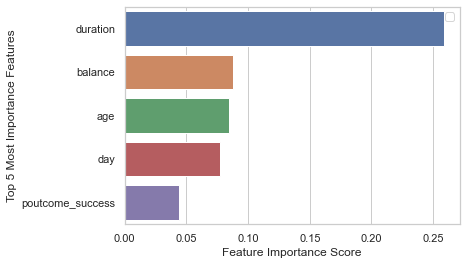

In [34]:
%matplotlib inline

# Creating a bar plot
sns.barplot(x=z,y=z.index)

# Add labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Top 5 Most Importance Features')
plt.legend()
plt.show()

Berdasarkan feature importance score, dapat dilihat bahwa atribut "duration" memiliki score tertinggi.

Mungkin atribut 'duration' dapat melambangkan besar kecilnya engagement dengan prospek customer, yang merupakan salah satu prediktor kesuksesan sales. Dan mungkin dikarenakan customer yang membeli memiliki nilai rata-rata 'duration' yang jauh lebih besar dibanding yang tidak.